In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Video
from collections import deque
import cv2
import numpy as np

2023-10-09 04:17:15.405299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# loading the model
model_path = 'best_model.h5'
model = load_model(model_path)

In [3]:
def play_video(file_path):
    return Video(file_path,embed=True)

In [18]:
# predict function
def get_prediction(file_path):
    ans = 0
    logs = []
    result = ""
    capture_video = cv2.VideoCapture(file_path)
    writer = None
    (width,height) = (None,None)

    while True:
        (taken,frame) = capture_video.read()
        if not taken:
            break
        if width is None or height is None:
            (width,height) = frame.shape[:2]

        frame = cv2.resize(frame,(256,256)).astype("float32")
        preds = model.predict(np.expand_dims(frame,axis=0), verbose=0)[0]
        logs.append(preds)
        ans+=preds
        # results = np.array(queue).mean(axis=0)
        # i = np.argmax(results)
        
    if ans > 1e-25:
        result = "Foul"
    else:
        result = "Clean"
    logs = np.array(logs)
    logs = logs.ravel()
    return result,ans,logs

In [19]:
# generating predictions
file_path = '/home/harsh/Videos/back_foul.mp4'
display(play_video(file_path))
pred,ans,logs = get_prediction(file_path)
pred,ans

('Foul', array([3.4836885e-19], dtype=float32))

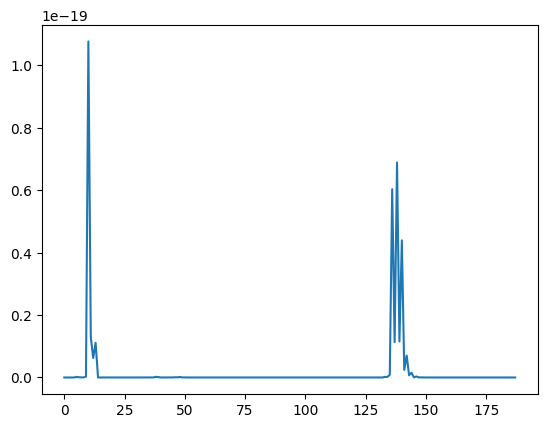

In [20]:
plt.plot(logs)